<a href="https://colab.research.google.com/github/veeramohansadhu/Assignment1/blob/main/Banking_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
Bank=pd.read_csv("/content/BankData(1).csv") #Load the dataset into a DataFrame.
Bank.info() #Get info about columns (data types, nulls).
Bank.head() #View the first few rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         4016 non-null   int64  
 1   Name                4016 non-null   object 
 2   Surname             4016 non-null   object 
 3   Gender              4016 non-null   object 
 4   Age                 4016 non-null   int64  
 5   Region              4016 non-null   object 
 6   Job Classification  4016 non-null   object 
 7   Date Joined         4016 non-null   object 
 8   Balance             4016 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 282.5+ KB


,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,1,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [104]:
Bank.describe() #Get basic statistics (mean, min, max, etc.) for numerical columns.

,Customer ID,Age,Balance
count,4.016000e+03,4016.000000,4016.000000
mean,1.698476e+08,38.608317,39761.730515
std,8.907751e+07,9.817473,29852.799653
min,1.000000e+00,15.000000,11.520000
25%,1.000020e+08,31.000000,16123.322500
50%,1.000038e+08,37.000000,33557.590000
75%,2.000031e+08,45.000000,57524.850000
max,6.000040e+08,64.000000,183467.700000


In [105]:
Bank["Date Joined"]=pd.to_datetime(Bank["Date Joined"]) #Convert Date Joined to datetime
Bank

<ipython-input-105-2802363834>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Bank["Date Joined"]=pd.to_datetime(Bank["Date Joined"]) #Convert Date Joined to datetime


,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,1,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79
...,...,...,...,...,...,...,...,...,...
4011,200004012,Hannah,Springer,Female,50,Scotland,Other,2015-12-30,59477.82
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,2015-12-30,239.45
4013,300004014,Stephen,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19
4014,500004014,Ram,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19


In [106]:
Bank.duplicated().sum() #checking duplicates

np.int64(0)

In [107]:
#Invalid Value Check
print(Bank[Bank["Age"]<18])
print(Bank[Bank["Age"]>100])
print(Bank[Bank["Balance"]<0])


      Customer ID        Name    Surname  Gender  Age            Region  \
358     400000359   Gabrielle  MacDonald  Female   17  Northern Ireland   
1233    400001234      Olivia       Dyer  Female   17  Northern Ireland   
1425    400001426     Dominic      Young    Male   17  Northern Ireland   
1670    400001671  Bernadette   Metcalfe  Female   17  Northern Ireland   
2637    400002638    Jennifer  Sanderson  Female   15  Northern Ireland   

     Job Classification Date Joined   Balance  
358               Other  2015-05-03  65798.40  
1233              Other  2015-07-15  13301.43  
1425              Other  2015-07-28   5158.87  
1670        Blue Collar  2015-08-19  97610.35  
2637       White Collar  2015-10-15  12548.21  
Empty DataFrame
Columns: [Customer ID, Name, Surname, Gender, Age, Region, Job Classification, Date Joined, Balance]
Index: []
Empty DataFrame
Columns: [Customer ID, Name, Surname, Gender, Age, Region, Job Classification, Date Joined, Balance]
Index: []


In [108]:
#Clean Categorical Columns

print(Bank["Gender"].unique())
print(Bank["Region"].unique())
print(Bank["Job Classification"].unique())

['Male' 'Female']
['England' 'Northern Ireland' 'Wales' 'Scotland']
['White Collar' 'Blue Collar' 'Other']


In [109]:
# Create a new column that shows number of years since the customer joined.

Bank["Customer Tenure (Years)"] = pd.to_datetime("today").year - Bank["Date Joined"].dt.year
Bank

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,Customer Tenure (Years)
0,1,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15,10
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73,10
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83,10
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52,10
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79,10
...,...,...,...,...,...,...,...,...,...,...
4011,200004012,Hannah,Springer,Female,50,Scotland,Other,2015-12-30,59477.82,10
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,2015-12-30,239.45,10
4013,300004014,Stephen,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19,10
4014,500004014,Ram,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19,10


In [110]:
Bank["Age Group"] = pd.cut(Bank["Age"], bins=[0, 25, 45, 65, 100],
                           labels=["Youth", "Adult", "Mid-Age", "Senior"])
Bank

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,Customer Tenure (Years),Age Group
0,1,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15,10,Youth
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73,10,Adult
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83,10,Mid-Age
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52,10,Adult
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79,10,Adult
...,...,...,...,...,...,...,...,...,...,...,...
4011,200004012,Hannah,Springer,Female,50,Scotland,Other,2015-12-30,59477.82,10,Mid-Age
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,2015-12-30,239.45,10,Mid-Age
4013,300004014,Stephen,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19,10,Adult
4014,500004014,Ram,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19,10,Adult


In [111]:
#Gender-wise Customer Distribution
Bank["Gender"].value_counts()

,count
Gender,
Male,2167
Female,1849


In [112]:
# Region-wise Balance Distribution

Bank.groupby("Region")["Balance"].agg(["sum","mean"])

,sum,mean
Region,,
England,84833397.00,39292.911996
Northern Ireland,8335566.39,39505.053981
Scotland,44410730.72,39511.326263
Wales,22103415.64,42343.708123


In [113]:
# Age Group vs Balance
#Understand which Age Group (Youth, Adult, etc.) has higher average balance. This helps in targeted marketing.
Bank.groupby("Age Group")["Balance"].agg(["max","mean"])

<ipython-input-113-2323035710>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Bank.groupby("Age Group")["Balance"].agg(["max","mean"])


,max,mean
Age Group,,
Youth,149698.12,38506.679406
Adult,183467.70,39773.497231
Mid-Age,172085.48,40122.295855
Senior,NaN,NaN


In [114]:
#Job Classification-wise Average Balance
Bank.groupby("Job Classification")["Balance"].agg(["max","mean"])

,max,mean
Job Classification,,
Blue Collar,161517.82,39385.958021
Other,172085.48,39824.341416
White Collar,183467.70,39931.397974


In [115]:
#Find the Region & Job combination with the Highest Average Balance
Bank.groupby(["Region","Job Classification"])["Balance"].agg(["max","mean"])

max          mean
Region           Job Classification                         
England          Blue Collar         161517.82  38567.841570
                 Other               133630.50  40740.269522
                 White Collar        183467.70  39156.305710
Northern Ireland Blue Collar         149698.12  38672.092439
                 Other               133050.09  38785.713238
                 White Collar        146569.77  41192.472462
Scotland         Blue Collar         141792.50  39288.961029
                 Other               172085.48  39602.168306
                 White Collar        139610.13  40415.005238
Wales            Blue Collar         134324.66  42365.195000
                 Other               136365.52  39104.892947
                 White Collar        145995.97  43343.924656

In [116]:
#Gender vs Region-wise Customer Count
Bank.groupby(["Gender","Region"]).size()

Gender  Region          
Female  England             1091
        Northern Ireland     157
        Scotland             319
        Wales                282
Male    England             1068
        Northern Ireland      54
        Scotland             805
        Wales                240
dtype: int64

In [117]:
# Find the Region with the Most Customers
Bank.groupby("Region").size()

,0
Region,
England,2159
Northern Ireland,211
Scotland,1124
Wales,522


In [118]:
#Customer Join Trend Over Time
Bank = pd.read_csv("/content/BankData(1).csv", parse_dates=["Date Joined"])
Bank.groupby(Bank["Date Joined"].dt.year).size()


<ipython-input-118-2611101932>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Bank = pd.read_csv("/content/BankData(1).csv", parse_dates=["Date Joined"])


,0
Date Joined,
2015,4016


In [119]:
#Segment customers based on their Balance into 3 levels
Bank["Balance Level"] = pd.cut(
    Bank["Balance"],
    bins=[0, 50000, 150000, 250000],  # Adjusted bin ranges
    labels=["Low Balance", "Medium Balance", "High Balance"]
)
Bank

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,Balance Level
0,1,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15,Medium Balance
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73,Low Balance
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83,Medium Balance
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52,Low Balance
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79,Low Balance
...,...,...,...,...,...,...,...,...,...,...
4011,200004012,Hannah,Springer,Female,50,Scotland,Other,2015-12-30,59477.82,Medium Balance
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,2015-12-30,239.45,Low Balance
4013,300004014,Stephen,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19,Low Balance
4014,500004014,Ram,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19,Low Balance


In [120]:
Bank["Balance Level"].value_counts()

,count
Balance Level,
Low Balance,2738
Medium Balance,1274
High Balance,4


In [121]:
#Insight: Average Age by Balance Level
Bank.groupby("Balance Level")["Age"].mean()

<ipython-input-121-1775102910>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Bank.groupby("Balance Level")["Age"].mean()


,Age
Balance Level,
Low Balance,38.575603
Medium Balance,38.674254
High Balance,40.000000


In [122]:
#Gender-wise Balance Level Distribution
Bank.groupby(["Gender","Balance Level"]).size()

<ipython-input-122-2986084349>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Bank.groupby(["Gender","Balance Level"]).size()


Gender  Balance Level 
Female  Low Balance       1274
        Medium Balance     574
        High Balance         1
Male    Low Balance       1464
        Medium Balance     700
        High Balance         3
dtype: int64

In [123]:
# Region-Wise Balance Level Distribution
Bank.groupby(["Region","Balance Level"]).size().unstack()

<ipython-input-123-2938137511>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Bank.groupby(["Region","Balance Level"]).size().unstack()


Balance Level,Low Balance,Medium Balance,High Balance
Region,,,
England,1482,674,3
Northern Ireland,142,69,0
Scotland,766,357,1
Wales,348,174,0


In [124]:
#Job Classification vs Balance Level
Bank.groupby(["Balance Level","Job Classification"]).size().unstack()

<ipython-input-124-892121103>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Bank.groupby(["Balance Level","Job Classification"]).size().unstack()


Job Classification,Blue Collar,Other,White Collar
Balance Level,,,
Low Balance,718,674,1346
Medium Balance,332,335,607
High Balance,1,1,2


In [125]:
#Region vs Age Group
Bank["Age Group"]=pd.cut(Bank["Age"],bins=[0,25,45,65,100],labels=["Youth","Adult","Mid-Age","Seniors"])
Bank.groupby(["Region","Age Group"]).size().unstack()

<ipython-input-125-2140533514>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Bank.groupby(["Region","Age Group"]).size().unstack()


Age Group,Youth,Adult,Mid-Age,Seniors
Region,,,,
England,190,1829,140,0
Northern Ireland,55,150,6,0
Scotland,9,327,788,0
Wales,49,442,31,0


In [126]:
#Customer Join Trend Over Time
Bank["Join Year"]=Bank["Date Joined"].dt.year
Bank.groupby("Join Year")["Customer ID"].size()
Bank

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,Balance Level,Age Group,Join Year
0,1,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15,Medium Balance,Youth,2015
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73,Low Balance,Adult,2015
2,100000003,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83,Medium Balance,Mid-Age,2015
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,2015-01-08,1421.52,Low Balance,Adult,2015
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,2015-01-09,35639.79,Low Balance,Adult,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
4011,200004012,Hannah,Springer,Female,50,Scotland,Other,2015-12-30,59477.82,Medium Balance,Mid-Age,2015
4012,200004013,Christian,Reid,Male,51,Scotland,Blue Collar,2015-12-30,239.45,Low Balance,Mid-Age,2015
4013,300004014,Stephen,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19,Low Balance,Adult,2015
4014,500004014,Ram,May,Male,33,Wales,Blue Collar,2015-12-30,30293.19,Low Balance,Adult,2015


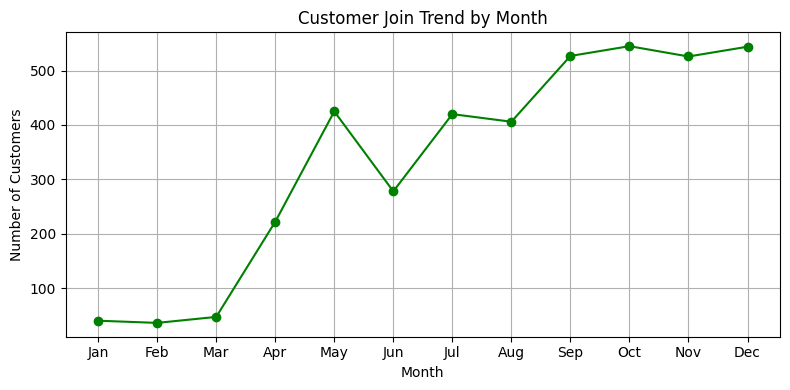

In [127]:
#Customer Join Trend by Month
import matplotlib.pyplot as plt

Bank["Month"] = Bank["Date Joined"].dt.month
monthly_trend = Bank.groupby("Month")["Customer ID"].size()

# Plot
plt.figure(figsize=(8,4))
monthly_trend.plot(kind="line", marker="o", color="green")
plt.title("Customer Join Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.tight_layout()
plt.show()


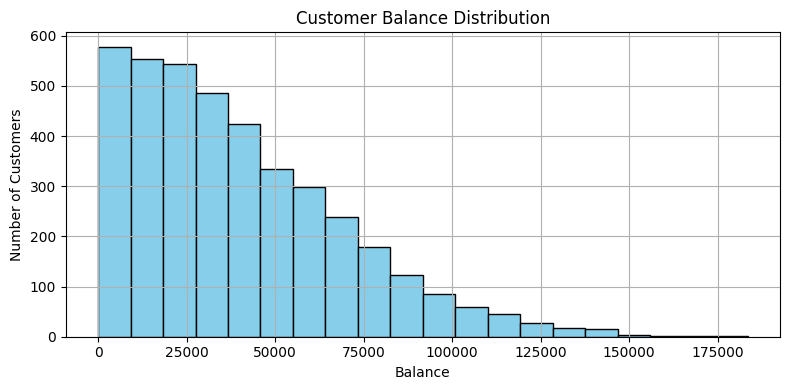

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))

plt.hist(Bank["Balance"], bins=20, color="skyblue", edgecolor="black")
plt.title("Customer Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Number of Customers")

plt.grid(True)
plt.tight_layout()
plt.show()


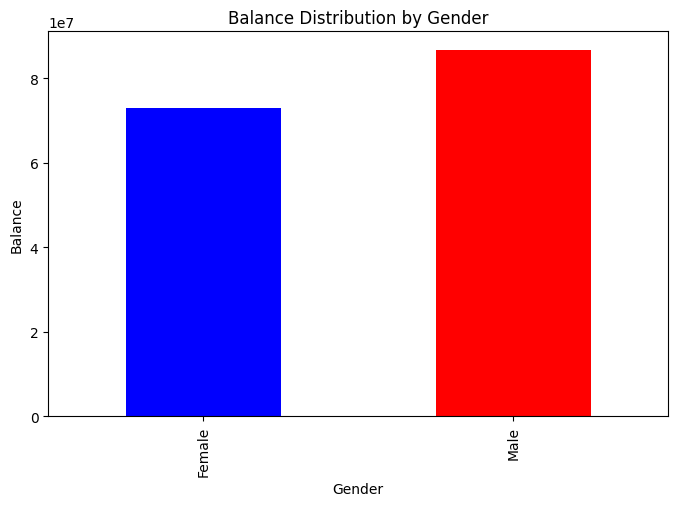

In [129]:
#Balance Distribution by Gender
import matplotlib.pyplot as plt
Bal_Gender=Bank.groupby("Gender")["Balance"].sum()
plt.figure(figsize=(8,5))
Bal_Gender.plot(kind="bar",color=["blue","red"])
plt.title("Balance Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Balance")
plt.show()

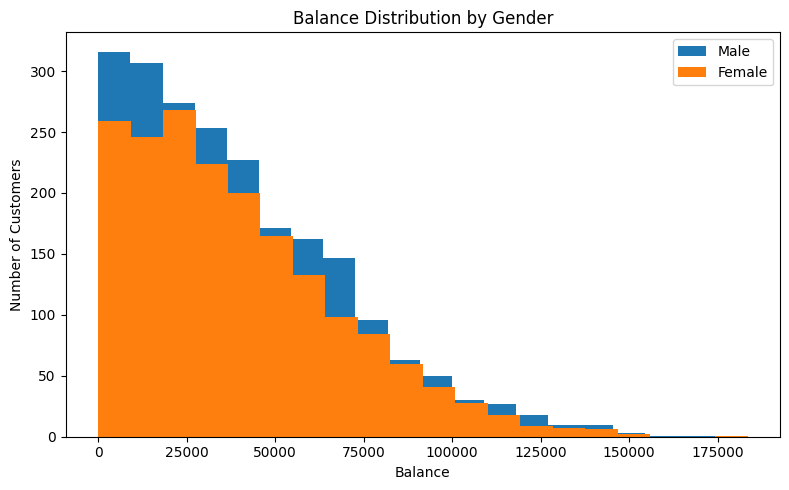

In [130]:
import matplotlib.pyplot as plt

# Step 1: Set the figure size
plt.figure(figsize=(8,5))

# Step 2: Plot histograms for each gender
for gender in Bank["Gender"].unique():
    subset = Bank[Bank["Gender"] == gender]
    plt.hist(subset["Balance"], bins=20, alpha=1, label=gender)
# Step 3: Add labels and title
plt.title("Balance Distribution by Gender")
plt.xlabel("Balance")
plt.ylabel("Number of Customers")

# Step 4: Add legend and layout adjustments
plt.legend()
plt.tight_layout()

# Step 5: Show plot
plt.show()


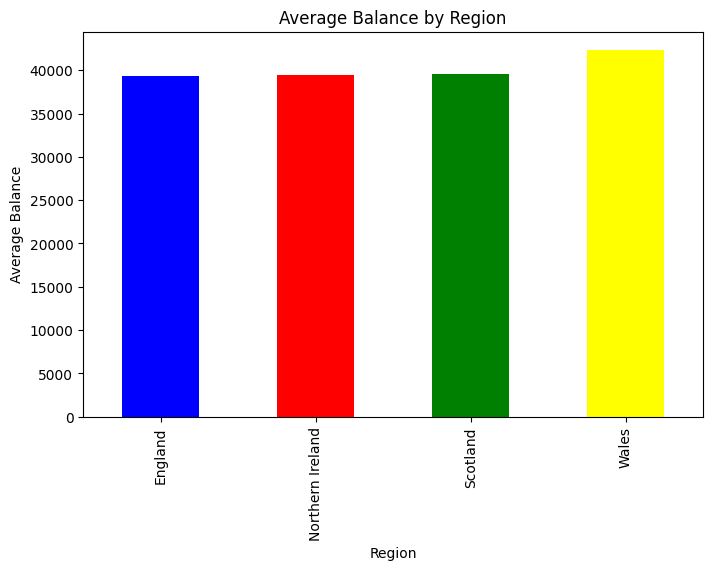

In [131]:
#Average Balance by Region
import matplotlib.pyplot as plt
Bal_Region=Bank.groupby("Region")["Balance"].mean()
plt.figure(figsize=(8,5))
Bal_Region.plot(kind="bar",color=["blue","red","green","yellow"])
plt.title("Average Balance by Region")
plt.xlabel("Region")
plt.ylabel("Average Balance")
plt.show()

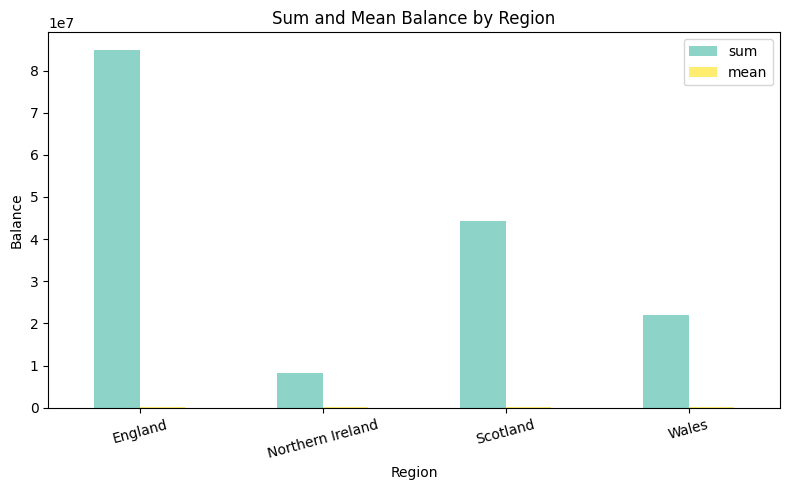

In [137]:
sum_mean_Region=Bank.groupby("Region")["Balance"].agg(["sum","mean"])
sum_mean_Region.plot(kind="bar", colormap="Set3", figsize=(8,5))
plt.title("Sum and Mean Balance by Region")
plt.xlabel("Region")
plt.ylabel("Balance")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Sum and Mean Balance by Region')

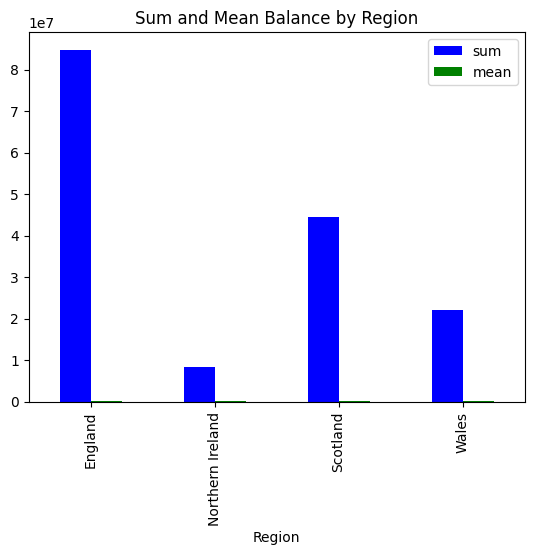

In [134]:

sum_mean_Region=Bank.groupby("Region")["Balance"].agg(["sum","mean"])
sum_mean_Region.plot(kind="bar",color=["blue","Green"])
plt.title("Sum and Mean Balance by Region")

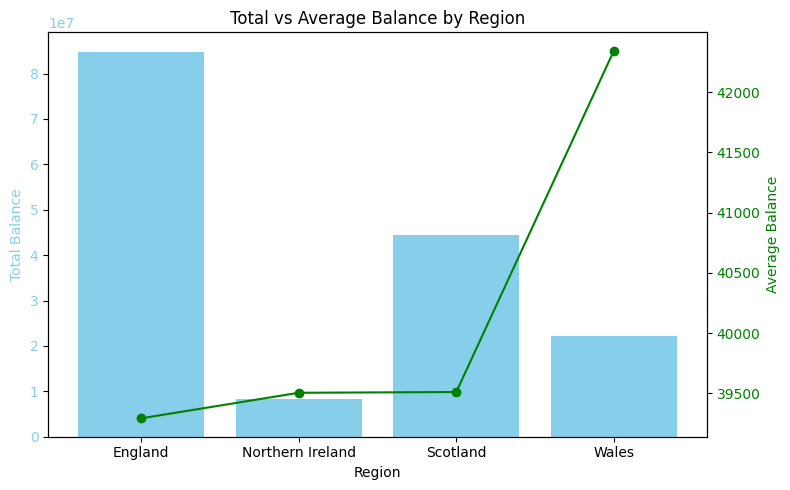

In [144]:
import matplotlib.pyplot as plt

# Group by Region: Sum and Mean
sum_balance = Bank.groupby("Region")["Balance"].sum()
mean_balance = Bank.groupby("Region")["Balance"].mean()

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plot Sum on ax1
ax1.bar(sum_balance.index, sum_balance.values, color='skyblue', label='Total Balance')
ax1.set_ylabel("Total Balance", color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create second axis sharing same x-axis
ax2 = ax1.twinx()

# Plot Mean on ax2
ax2.plot(mean_balance.index, mean_balance.values, color='green', marker='o', label='Average Balance')
ax2.set_ylabel("Average Balance", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and X-label
plt.title("Total vs Average Balance by Region")
ax1.set_xlabel("Region")

plt.tight_layout()
plt.show()


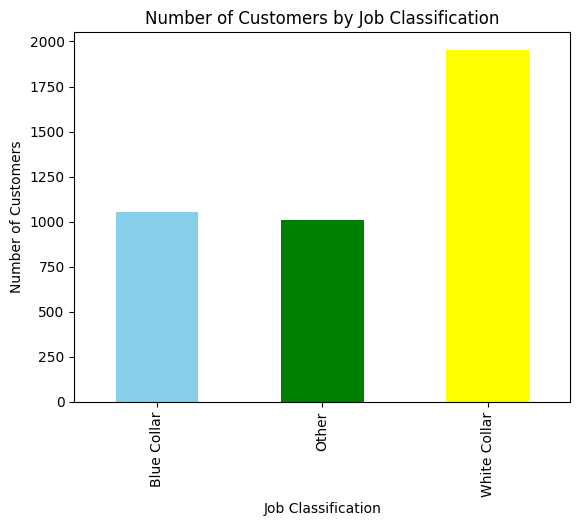

In [147]:
#Plot the Number of Customers by Job Classification
Customer_JC=Bank.groupby("Job Classification")["Customer ID"].size()
Customer_JC.plot(kind="bar",color=["skyBlue","Green","yellow"])
plt.title("Number of Customers by Job Classification")
plt.xlabel("Job Classification")
plt.ylabel("Number of Customers")
plt.show()

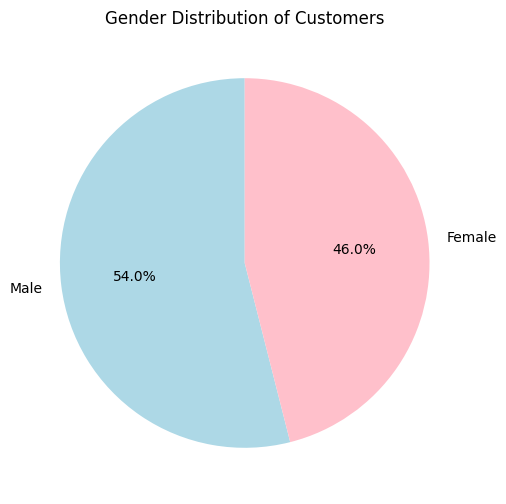

In [161]:
#Gender Distribution of Customers
Gender_dist = Bank["Gender"].value_counts()

plt.figure(figsize=(6, 6))
Gender_dist.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["lightblue", "pink"])
plt.title("Gender Distribution of Customers")
plt.ylabel("")
plt.show()


<ipython-input-180-3210913465>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Avg_Bal_Age=Bank.groupby("Age Group")["Balance"].mean()


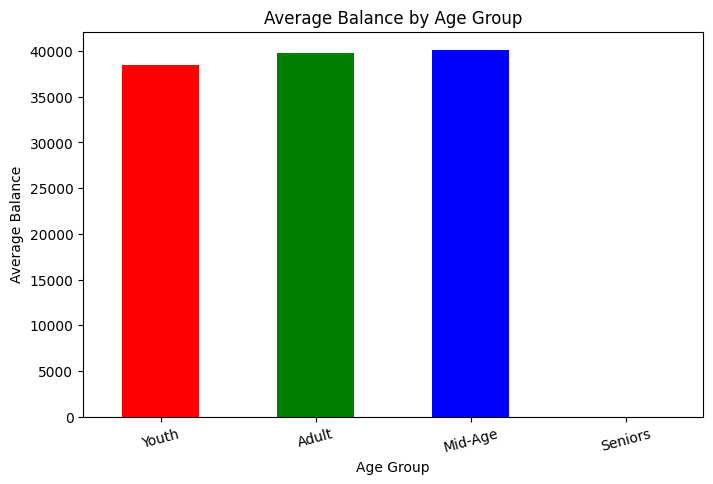

In [180]:
#Plot Average Balance by Age Group
Avg_Bal_Age=Bank.groupby("Age Group")["Balance"].mean()
Avg_Bal_Age.plot(kind="bar",color=["Red","Green","Blue","yellow"],figsize=(8,5))
plt.xticks(rotation=15)
plt.title("Average Balance by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Balance")
plt.show()

<ipython-input-195-3477442488>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Bank.groupby(["Month", "Balance Level"]).size().unstack().plot(kind="bar", figsize=(10,5))


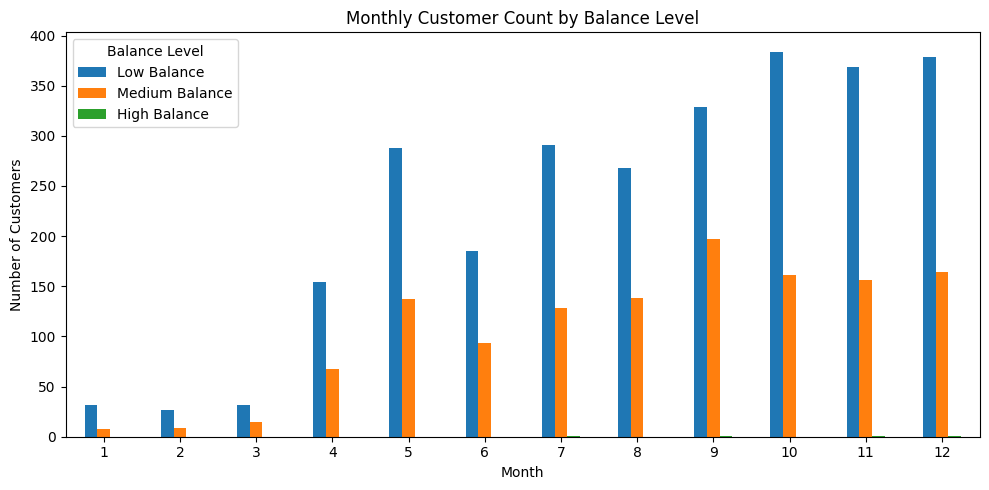

In [195]:
#how monthly customer join trend for each Balance Level
Bank["Month"] = pd.to_datetime(Bank["Date Joined"]).dt.month
Bank.groupby(["Month", "Balance Level"]).size().unstack().plot(kind="bar", figsize=(10,5))
plt.title("Monthly Customer Count by Balance Level")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



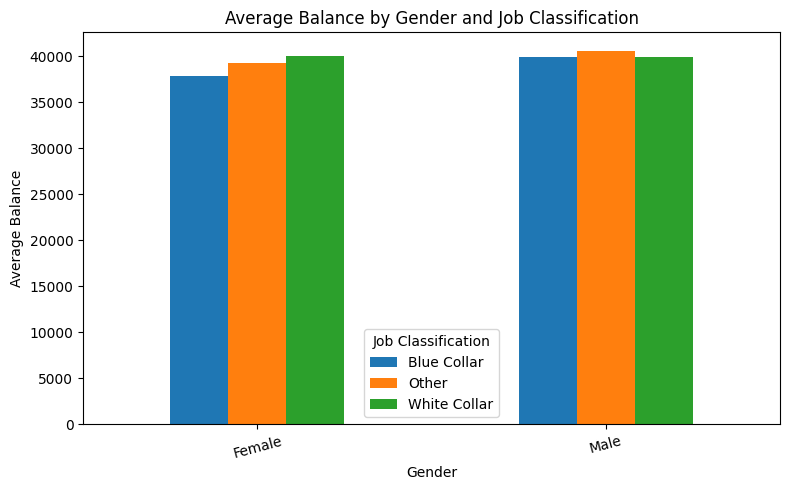

In [199]:
#Analyze the Average Balance by Gender across Job Classifications
Bank.groupby(["Gender","Job Classification"])["Balance"].mean().unstack().plot(kind="bar",figsize=(8,5))
plt.xticks(rotation=15)
plt.title("Average Balance by Gender and Job Classification")
plt.xlabel("Gender")
plt.ylabel("Average Balance")
plt.tight_layout()
plt.show()


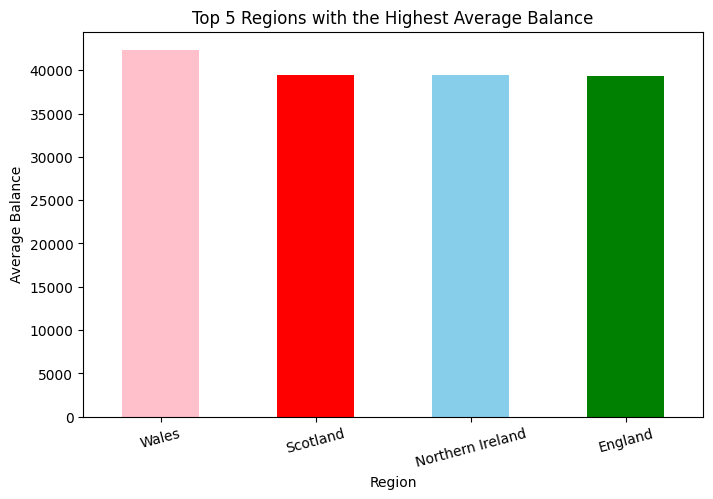

In [207]:
#Plot the Top 5 Regions with the Highest Average Balance
High_Avg=Bank.groupby("Region")["Balance"].mean()
High_Avg.sort_values(ascending=False).head().plot(kind="bar",color=["pink","red","skyblue","green"],figsize=(8,5))
plt.xticks(rotation=15)
plt.title("Top 5 Regions with the Highest Average Balance")
plt.xlabel("Region")
plt.ylabel("Average Balance")
plt.show()